# Classifying movie reviews into positive or negative reviews

IMDB: Internet Movie Database: https://www.imdb.com/

Dataset (smaller version): https://www.kaggle.com/utathya/imdb-review-dataset/version/1

This workshop covers:
- Loading the text dataset
- Text Processing Techniques
- Text Vectorisation
- Visualising Text Vectors
- Training a Classifier using Text Vectors

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

## Load data

In [59]:
df = pd.read_csv('imdb_master.csv',
                 encoding='latin_1', index_col=0)

df1 = df.loc[df.label != 'unsup']

df1.label.value_counts() # count each label value

pos    25000
neg    25000
Name: label, dtype: int64

In [60]:
df_train = df1.loc[df1.type == 'train']
df_test = df1.loc[df1.type == 'test']

In [61]:
df_train = df_train.sample(n=2000, random_state=42)
df_test = df_test.sample(n=2000, random_state=42)

# Process Text

## Text processing:
- Tokenise: split text into words
- Lemmatise: look at word form, considering noun, adjective, etc
- Stem: get the word stem (bluntly chop off the end)

### Goals:
- Identify unique words
- Avoid duplicating the same word form (e.g. cat, cats) in order to keep number of features small

### Curse of Dimensionality:
- 1 word is at least 1 feature (not considering N-grams - sequences of N words)
- Reducing number of words will improve scalability

## Install Natural Language Toolkit (NLTK)

From Anaconda environment:
```
conda install nltk
```

In [62]:
# Requires: conda install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\issohl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\issohl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\issohl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Tokenise

In [63]:
from nltk import word_tokenize

text = 'Hello this is a test.'

## Lemmatise

In [64]:
from nltk.stem import WordNetLemmatizer

text = 'he liked cats and dogs, and teaching machines to learn'

## Stem

In [65]:
from nltk.stem import SnowballStemmer

text = 'he liked cats and dogs, and teaching machines to learn'
stem = SnowballStemmer(language='english')

## Stop words

In [66]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

text = 'he liked cats and dogs, and teaching machines to learn'

In [67]:
print(stop)

{'during', 'they', 'other', 'that', "needn't", "mightn't", "it's", 'when', 'against', 'before', 'all', 'where', 'than', 'himself', 'down', 'ourselves', 'why', 'hadn', 'are', 'few', 'should', 'yourselves', 'o', 'into', 'after', 'd', 'couldn', 'on', 'shouldn', 'll', 'he', 'it', 'have', "couldn't", 'so', 'i', 't', "you'd", 'at', "hasn't", "wouldn't", 'who', 'up', 'then', 'those', 's', 'we', 'out', 'yours', 'any', 'having', 'most', 'how', 'by', 'between', "didn't", 'wouldn', 'be', 'ma', 'didn', 'some', 'which', 'being', "don't", 'hasn', 'these', 'more', 'further', 'ain', 'did', 'myself', 'mustn', 'do', 'will', "aren't", 'through', 're', 'an', 'weren', 'had', 'theirs', 'his', 'over', 'nor', 'y', 'again', 'under', 'her', 'both', 'not', 'them', 'if', 'from', "you've", 'yourself', 'too', 'a', 'this', 'wasn', 'your', 'mightn', 'herself', "weren't", "shan't", 'don', 'my', 'to', 'and', "wasn't", 'haven', 'm', 'off', "should've", 'their', 'of', 'does', "you're", "doesn't", 'each', 'itself', 'can',

# Vectorise Text

Vectorisation converts words into vectors of numbers

Common ways:
- By word count: CountVectorizer
- By word and document frequency: TfidfVectorizer
- By word vectors (gensim Word2Vec)

## Word Count Vectorisation

* Words that are used more frequently get a higher count

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
   'This is the first document.',
   'This document is the second document.',
   'And this is the third one.',
   'Is this the first document?',
]

## Word and Document Frequency (TF-IDF) Vectorisation

- TF: Term Frequency: rewards words commonly used in a document
- IDF: Inverse Document Frequency: penalises words commonly used in all documents

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
   'This is the first document.',
   'This document is the second document.',
   'And this is the third one.',
   'Is this the first document?',
]

## Word2Vec

Word2Vec generates word-vectors where vectors close together in vector space have similar meanings based on context, and word-vectors distant to each other have differing meanings.

https://radimrehurek.com/gensim/models/word2vec.html

https://radimrehurek.com/gensim/models/keyedvectors.html

### Install gensim

Gensim is a library to train word vectors and to consume pre-trained word vectors.

From Anaconda environment:
```
conda install gensim
```

In [70]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

corpus = [
    'Dashing through the snow',
    'In a one-horse open sleigh',
    'Over the fields we go',
    'Laughing all the way',
    'Bells on bob-tail ring',
    'Making spirits bright',
    'What fun it is to ride and sing a sleighing song tonight'
]

# split text into words
corpus_tokens = [word_tokenize(doc.lower()) for doc in corpus]

vector_size=10 # vector representation (typically about 50-100 for larger vocabs)
window_size=3 # how many words to see around it (depending on task)

# train
word2vec = Word2Vec(corpus_tokens, size=vector_size, window=window_size,
                    min_count=1, workers=4)

# model.save("word2vec.model") # save for use later

word2vec.wv['snow'] # numpy vector of a word

array([ 0.02432165,  0.0455005 , -0.02880215, -0.01555269,  0.01685715,
        0.01092012, -0.02440065,  0.04818794, -0.00813113,  0.02975553],
      dtype=float32)

In [71]:
# find similar words
word2vec.most_similar('snow')

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('to', 0.6324091553688049),
 ('laughing', 0.6223492622375488),
 ('fields', 0.4292348027229309),
 ('spirits', 0.40156325697898865),
 ('bright', 0.3750440776348114),
 ('tonight', 0.3327932357788086),
 ('all', 0.30081361532211304),
 ('bob-tail', 0.19522309303283691),
 ('fun', 0.1860320270061493),
 ('through', 0.12681089341640472)]

In [72]:
# inspect vocabulary
word2vec.wv.vocab

{'dashing': <gensim.models.keyedvectors.Vocab at 0x24289995400>,
 'through': <gensim.models.keyedvectors.Vocab at 0x24289995470>,
 'the': <gensim.models.keyedvectors.Vocab at 0x24289995438>,
 'snow': <gensim.models.keyedvectors.Vocab at 0x242899954a8>,
 'in': <gensim.models.keyedvectors.Vocab at 0x242899954e0>,
 'a': <gensim.models.keyedvectors.Vocab at 0x24289995518>,
 'one-horse': <gensim.models.keyedvectors.Vocab at 0x24289995550>,
 'open': <gensim.models.keyedvectors.Vocab at 0x24289995588>,
 'sleigh': <gensim.models.keyedvectors.Vocab at 0x242899955c0>,
 'over': <gensim.models.keyedvectors.Vocab at 0x242899955f8>,
 'fields': <gensim.models.keyedvectors.Vocab at 0x24289995630>,
 'we': <gensim.models.keyedvectors.Vocab at 0x24289995668>,
 'go': <gensim.models.keyedvectors.Vocab at 0x242899956a0>,
 'laughing': <gensim.models.keyedvectors.Vocab at 0x242899956d8>,
 'all': <gensim.models.keyedvectors.Vocab at 0x24289995710>,
 'way': <gensim.models.keyedvectors.Vocab at 0x24289995748>,
 

In [73]:
# get word vectors
word2vec.wv.vectors.shape

(34, 10)

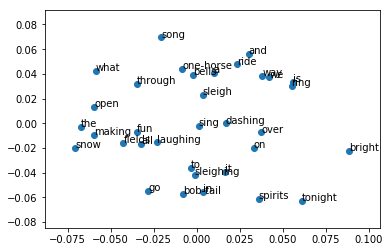

In [74]:
# plot the vectors in vector space
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

wv_2d = pca.fit_transform(word2vec.wv.vectors)

fig, ax = plt.subplots()
vocab = word2vec.wv.vocab

ax.scatter(wv_2d[:, 0], wv_2d[:, 1])

for i, word in enumerate(vocab):
    ax.annotate(word, (wv_2d[i, 0], wv_2d[i, 1]))

### Pre-trained Word2Vec models

Instead of training your own word2vec, you can alternatively load the (large!) pre-trained models

https://github.com/RaRe-Technologies/gensim-data

# Putting it together

### TF-IDF vectorisation

In [75]:
class StemmerTokenizer(object):
    def __init__(self):
        self.stemmer = SnowballStemmer(language='english')
        self.stop = set(stopwords.words('english'))

    def __call__(self, doc):

        # tokenize text into tokens
        tokens = word_tokenize(doc)

        # strip out punctuation
        words = [t for t in tokens if t.isalpha()]
        
        # strip out stopwords
        words = [t for t in words if t not in self.stop]
        
        # lemmatize each token
        return [self.stemmer.stem(t) for t in words]

tfidf = TfidfVectorizer(analyzer='word', tokenizer=StemmerTokenizer())

### Word2Vec

Word2Vec vectors are more geared towards deep learning. We will revisit this after we've covered Deep Learning.

To use this with sklearn, we will need to perform an averaging or summing operation on the Word2Vec vectors.

Example: https://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/

In [76]:
stem_tokenise = StemmerTokenizer()
train_tokens = [stem_tokenise(review) for review in df_train.review]

# train word2vec
dimension = 50 # vector size of 5
window_size = 10 # 5 words around each token
word2vec = Word2Vec(train_tokens, size=dimension, window=window_size,
                    min_count=1, workers=4)

In [77]:
# inspect vocab
# inspect vectors
word2vec.wv.most_similar('horror')

[('funni', 0.9988646507263184),
 ('rate', 0.9983547925949097),
 ('overal', 0.997759997844696),
 ('suck', 0.997560977935791),
 ('end', 0.9975547790527344),
 ('fun', 0.9974384903907776),
 ('terribl', 0.9973731637001038),
 ('this', 0.9969583749771118),
 ('pretti', 0.9969315528869629),
 ('entertain', 0.9965165257453918)]

In [ ]:
# plot first N vectors
from sklearn.manifold import TSNE
num_to_plot = 100

tsne = TSNE(n_components=2)

wv_2d = tsne.fit_transform(word2vec.wv.vectors[:num_to_plot])

fig, ax = plt.subplots(figsize=(15, 10))
vocab = word2vec.wv.index2word[:num_to_plot]

ax.scatter(wv_2d[:, 0], wv_2d[:, 1])

for i, word in enumerate(vocab):
    ax.annotate(word, (wv_2d[i, 0], wv_2d[i, 1]))

#### Applying Word Vectors in sklearn (Advanced)

In [84]:
class EmbeddingVectorizer(object):
    def __init__(self, word2vec, dimension):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = dimension

    def fit_transform(self, X):
        return np.array([
            # take the mean of the word vectors for that word
            # or zero if the word is out of vocabulary
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [85]:
w2v = dict(zip(word2vec.wv.index2word, word2vec.wv.vectors))
mev = EmbeddingVectorizer(w2v, dimension)

Z_train_word2vec = mev.fit_transform(train_tokens)
Z_train_word2vec

array([[-1.0196497 ,  0.37326747,  0.52921486, ..., -0.43196118,
        -0.03446192,  0.24069342],
       [-0.9849607 ,  0.48519412,  0.6487241 , ..., -0.49223754,
        -0.11414311,  0.29095602],
       [-1.167735  ,  0.46075565,  0.66950035, ..., -0.510481  ,
        -0.06021508,  0.3042708 ],
       ...,
       [-0.9477591 ,  0.4235014 ,  0.58861554, ..., -0.45990774,
        -0.07499728,  0.26947865],
       [-0.99030614,  0.35024667,  0.5396627 , ..., -0.4345945 ,
        -0.00431083,  0.24832533],
       [-1.0121374 ,  0.40062177,  0.58204323, ..., -0.46473366,
        -0.04050661,  0.26623076]], dtype=float32)

# Visualisation in 2D

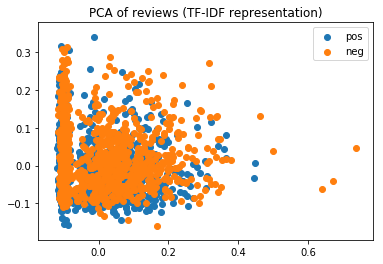

In [81]:
# visualize only the first n rows
n = 3000

# Vectors are about the same magnitude, so no need to scale
pca = PCA(n_components=2)
Z_train_2d = pca.fit_transform(Z_train[:n].todense())
y_train = df_train.label[:n]

fig, ax = plt.subplots()

labels = ['pos', 'neg']

for l in labels:
    ax.scatter(Z_train_2d[y_train == l, 0],
               Z_train_2d[y_train == l, 1],
               label=l)

ax.set(title='PCA of reviews (TF-IDF representation)')

ax.legend()

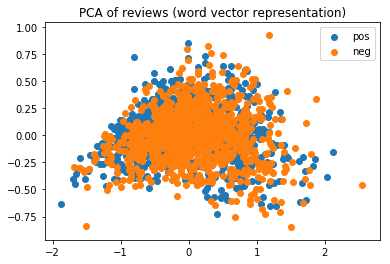

In [82]:
# visualize only the first n rows
n = 3000

# Vectors are about the same magnitude, so no need to scale
pca = PCA(n_components=2)
Z_train_2d = pca.fit_transform(Z_train_word2vec[:n])
y_train = df_train.label[:n]

fig, ax = plt.subplots()

labels = ['pos', 'neg']

for l in labels:
    ax.scatter(Z_train_2d[y_train == l, 0],
               Z_train_2d[y_train == l, 1],
               label=l)

ax.set(title='PCA of reviews (word vector representation)')
    
ax.legend()

# Training Classifiers

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix